In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch

In [ ]:
# objective: determine theta
# what design will sample half the measurements to tell us theta?

# theta: expected number of photons in a measurement
# design: threshold for measuring data
# y: generate N measurements

Text(0, 0.5, 'Counts')

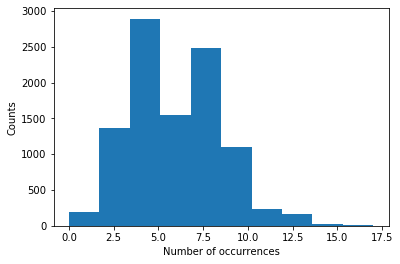

In [6]:
x = np.random.poisson(6, 10000)
plt.hist(x)
plt.xlabel("Number of occurrences")
plt.ylabel("Counts")

In [3]:
# sample y ~ p(y|theta,d)
def sample_likelihood(theta, design, n):
    # generate n samples
    x = np.random.poisson(theta, n)
    return np.sum(x >= design)/n # y = P(X >= k)

In [44]:
samples = [sample_likelihood(5,5,100000) for i in range(1000)]

Text(0, 0.5, 'Counts')

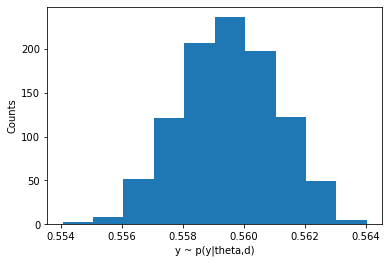

In [45]:
plt.hist(samples)
plt.xlabel("y ~ p(y|theta,d)")
plt.ylabel("Counts")

In [19]:
# p(theta)
def sample_prior():
    return np.random.uniform(0,10)

In [17]:
# p(theta, y | d)
def sample_joint(design, n):
    theta = sample_prior()
    y = sample_likelihood(theta, design, n)
    return theta, y

In [20]:
# specify threshold
design = 10
# specify number of samples to draw from the likelihood
# more samples -> more precise estimate of y
n = 10000
joint_samples = np.array([sample_joint(design,n) for i in range(1000)])

Text(0, 0.5, 'y ~ p(theta,y|d)')

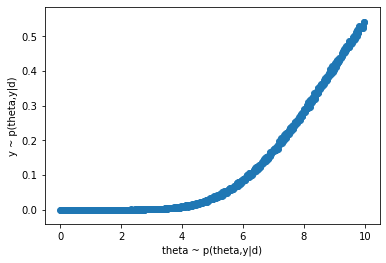

In [21]:
plt.scatter(joint_samples[:,0], joint_samples[:,1])
plt.xlabel("theta ~ p(theta,y|d)")
plt.ylabel("y ~ p(theta,y|d)")

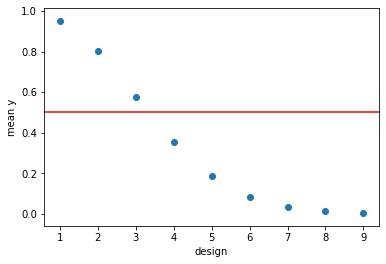

In [33]:
designs = [1,2,3,4,5,6,7,8,9]
n = 20000
mean_y = []
# for fixed theta, find the design that 
for d in designs:
    samples = np.array([sample_likelihood(3,d,n) for i in range(1000)])
    mean_y.append(np.mean(samples))
plt.figure()
plt.scatter(designs, mean_y)
plt.xlabel("design")
plt.ylabel("mean y")
# horizontal line at 0.5:
plt.axhline(y=0.5, color='r')
plt.show()

In [20]:
theta = torch.tensor(9.0)
torch_samples = [torch.poisson(theta) for i in range(10000)]

In [3]:
torch.poisson(torch.tensor(9.0))

tensor(12.)

(array([  72.,  492., 1517., 3717., 2196., 1259.,  632.,   91.,   20.,
           4.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ],
       dtype=float32),
 <a list of 10 Patch objects>)

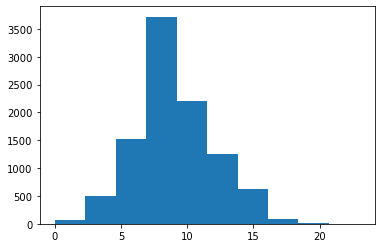

In [21]:
plt.hist(torch_samples)